# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import datetime

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
# #  1. Get the total rides for each city type
total_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]

print(total_rides_by_type["Urban"])
print(total_rides_by_type["Suburban"])
print(total_rides_by_type["Rural"])

1625
625
125


In [4]:
# 2. Get the total drivers for each city type
total_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]

print(total_drivers_by_type["Urban"])
print(total_drivers_by_type["Suburban"])
print(total_drivers_by_type["Rural"])

2405
490
78


In [5]:
# #  3. Get the total amount of fares for each city type
total_fare_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]

print(total_fare_by_type["Urban"])
print(total_fare_by_type["Suburban"])
print(total_fare_by_type["Rural"])

39854.380000000085
19356.330000000013
4327.930000000002


In [6]:
#  4. Get the average fare per ride for each city type. 
urban_avg_fare_per_ride = total_fare_by_type["Urban"] / total_rides_by_type["Urban"]
suburban_avg_fare_per_ride = total_fare_by_type["Suburban"] / total_rides_by_type["Suburban"]
rural_avg_fare_per_ride = total_fare_by_type["Rural"] / total_rides_by_type["Rural"]

print(urban_avg_fare_per_ride)
print(suburban_avg_fare_per_ride)
print(rural_avg_fare_per_ride)

24.52577230769236
30.97012800000002
34.623440000000016


In [7]:
# 5. Get the average fare per driver for each city type. 
urban_avg_fare_per_driver = total_fare_by_type["Urban"] / total_drivers_by_type["Urban"]
suburban_avg_fare_per_driver = total_fare_by_type["Suburban"] / total_drivers_by_type["Suburban"]
rural_avg_fare_per_driver = total_fare_by_type["Rural"] / total_drivers_by_type["Rural"]

print(urban_avg_fare_per_driver)
print(suburban_avg_fare_per_driver)
print(rural_avg_fare_per_driver)

16.57146777546781
39.50271428571431
55.48628205128208


In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_ride_summary_df = pd.DataFrame({"Total Rides": total_rides_by_type, "Total Drivers": total_drivers_by_type, "Total Fares": total_fare_by_type, "Average Fare per Ride": [rural_avg_fare_per_ride, suburban_avg_fare_per_ride, urban_avg_fare_per_ride], "Average Fare per Driver": [rural_avg_fare_per_driver, suburban_avg_fare_per_driver, urban_avg_fare_per_driver]})

pyber_ride_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:

# summary = {'Total Rides': [rural_ride_count, suburban_ride_count, urban_ride_count], 'Total Drivers': [total_drivers_by_type["Rural"], total_drivers_by_type["Suburban"], total_drivers_by_type["Urban"]], 'Total Fares': [rural_fare_count, suburban_fare_count, urban_fare_count], 'Average Fare per Ride': [rural_avg_fare_per_ride, suburban_avg_fare_per_ride, urban_avg_fare_per_ride], 'Average Fare per Driver': [rural_avg_fare_per_driver, suburban_avg_fare_per_driver, urban_avg_fare_per_driver]}
# pyber_summary_df = pd.DataFrame(data=summary)
# pyber_summary_df.head()

In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_ride_summary_df.index.name = None
pyber_ride_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [11]:
#  8. Format the columns.
pyber_ride_summary_df["Total Fares"] = pyber_ride_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_ride_summary_df["Average Fare per Ride"] = pyber_ride_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_ride_summary_df["Average Fare per Driver"] = pyber_ride_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_ride_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [13]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
# for each date where the indices are the city type and date.
total_fare_by_date = pyber_data_df.groupby(["date", "type"]).sum()[["fare"]]
total_fare_by_date

,,fare
date,type,
1/1/2019 0:08,Urban,37.91
1/1/2019 0:46,Suburban,47.74
1/1/2019 12:32,Suburban,25.56
1/1/2019 14:40,Urban,5.42
1/1/2019 14:42,Urban,12.31
...,...,...
5/8/2019 1:54,Urban,32.69
5/8/2019 2:31,Urban,41.33
5/8/2019 4:20,Urban,21.99


In [14]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
total_fare_by_date = total_fare_by_date.reset_index()
total_fare_by_date

,date,type,fare
0,1/1/2019 0:08,Urban,37.91
1,1/1/2019 0:46,Suburban,47.74
2,1/1/2019 12:32,Suburban,25.56
3,1/1/2019 14:40,Urban,5.42
4,1/1/2019 14:42,Urban,12.31
...,...,...,...
2359,5/8/2019 1:54,Urban,32.69
2360,5/8/2019 2:31,Urban,41.33
2361,5/8/2019 4:20,Urban,21.99
2362,5/8/2019 4:39,Urban,18.45


In [15]:
# Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.

total_fare_by_date['date']= pd.to_datetime(total_fare_by_date['date'])
total_fare_by_date

,date,type,fare
0,2019-01-01 00:08:00,Urban,37.91
1,2019-01-01 00:46:00,Suburban,47.74
2,2019-01-01 12:32:00,Suburban,25.56
3,2019-01-01 14:40:00,Urban,5.42
4,2019-01-01 14:42:00,Urban,12.31
...,...,...,...
2359,2019-05-08 01:54:00,Urban,32.69
2360,2019-05-08 02:31:00,Urban,41.33
2361,2019-05-08 04:20:00,Urban,21.99
2362,2019-05-08 04:39:00,Urban,18.45


In [16]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
total_fare_by_date = total_fare_by_date.pivot(index="date", columns="type", values="fare")
total_fare_by_date.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
2019-01-01 09:45:00,43.69,NaN,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31


In [17]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
jan_april_fares = total_fare_by_date.loc["2019-01-01":"2019-04-29"]
jan_april_fares


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-04-29 20:54:00,NaN,NaN,28.41
2019-04-29 21:20:00,NaN,NaN,13.59
2019-04-29 22:08:00,NaN,25.75,NaN


In [18]:
# 7. Check that the datatype for the index is datetime using df.info()
jan_april_fares.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2204 entries, 2019-01-01 00:08:00 to 2019-04-29 23:10:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  576 non-null    float64
 2   Urban     1515 non-null   float64
dtypes: float64(3)
memory usage: 68.9 KB


In [22]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_df = jan_april_fares.resample('W').sum()
weekly_fares_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


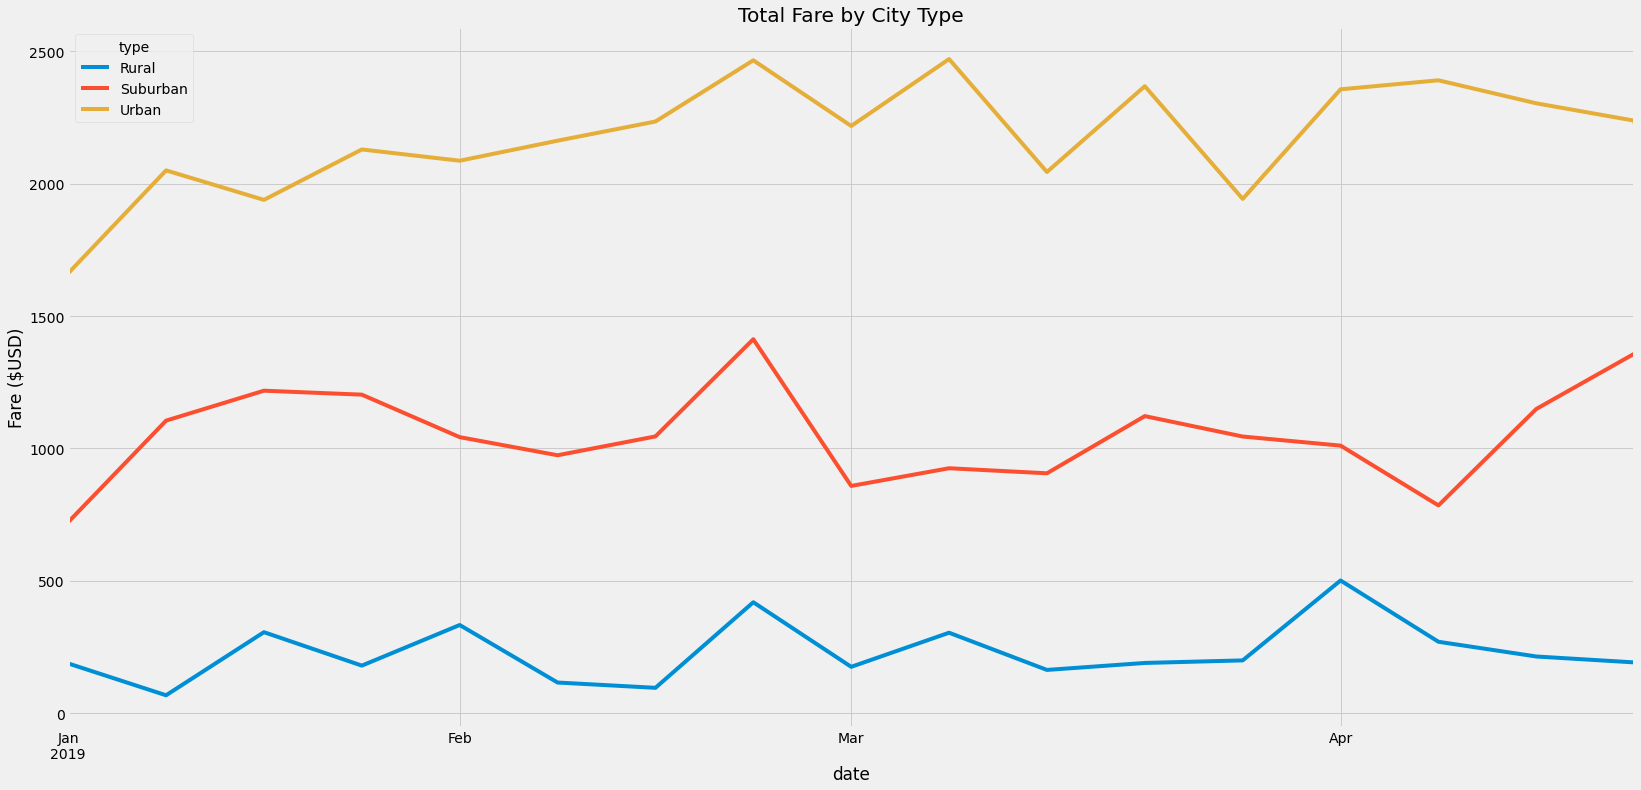

In [29]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
weekly_fares = weekly_fares_df.plot(figsize=(25,12), title="Total Fare by City Type", ylabel="Fare ($USD)")
# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
weekly_fares.set_xlim([pd.to_datetime('2019-01-01 23:50:00'), pd.to_datetime('2019-04-28 00:10:00')])
plt.savefig("analysis/PyBer_fare_summary.png")
plt.show()